In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tweepy
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASReddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASReddy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASReddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df=pd.read_csv('dataset.csv',encoding='Latin-1')

In [3]:
df.head(10)

,Tweets,label
0,"Dear Media, The Nation wants to know about st...",1
1,No. Like they've been saying all along. If yo...,-1
2,Spains second wave: Worrying that the report...,0
3,Congrats on the marriage thing. Hey Derby We...,1
4,We are really in September . Wow. Still livin...,1
5,The SoS for Health has to act with absolute ne...,1
6,Will Twitter and CNN Attack and Take Down FOX...,-1
7,"With Fans Forbidden Due To COVID-19, A Noticea...",-1
8,More deaths by suicide in Ireland this week t...,1
9,Of course it will spike. The people who go t...,1


In [4]:
df.isnull().sum()

Tweets    0
label     0
dtype: int64

In [5]:
wordnet=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [6]:
def change_text(a):
    a=str(a)
    text=re.sub('[^a-zA-Z]',' ',a)
    text=text.lower()
    text=nltk.word_tokenize(text)
    text=[wordnet.lemmatize(word) for word in text if word not in stop_words]
    text=' '.join(text)
    return text

In [7]:
df['tweet']=df['Tweets'].apply(change_text)
df.head()

,Tweets,label,tweet
0,"Dear Media, The Nation wants to know about st...",1,dear medium nation want know status covid case...
1,No. Like they've been saying all along. If yo...,-1,like saying along illness like diabetes high r...
2,Spains second wave: Worrying that the report...,0,spain second wave worrying report say median a...
3,Congrats on the marriage thing. Hey Derby We...,1,congrats marriage thing hey derby weekend stea...
4,We are really in September . Wow. Still livin...,1,really september wow still living covid


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X1= vectorizer.fit_transform(df['tweet'])
y=df['label']

In [9]:
import sklearn
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=42)

nb=MultinomialNB()

nb.fit(x_train,y_train)

MultinomialNB()

In [10]:
prediction=nb.predict(x_test)

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
cf_matrix=confusion_matrix(y_test,prediction)
print(cf_matrix)

[[96 15  4]
 [49 41  8]
 [49 14 20]]


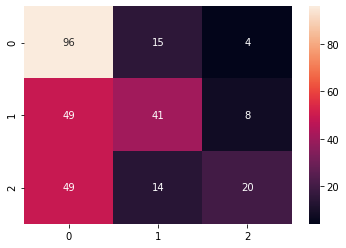

In [13]:
import seaborn as sns
sns.heatmap(cf_matrix,annot=True)

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.5304054054054054


In [15]:
accessToken="1272053768067010562-fQTNkoduS347TE8qzpLh8mxiYcB8TC"
accessTokenSecret="8yBxCzXyKobVV42fewzBtjbXNXGmtzTuPUg61ZaJyqZoz"
consumerKey="QDj1hUwKFp3Hnux2muCSoB4B9"
consumerKeySecret="ZRA0FRiAPzNKghZDyvP93BZYRu7fC6maiTrWmXPL349e0Lorv6"

In [16]:
auth=tweepy.OAuthHandler(consumerKey,consumerKeySecret)
auth.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(auth)

In [17]:
def cleanText(text):
    text=re.sub('https?://[^\s]+','',text)
    text=re.sub('@[^\s]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]','',text)
    text=re.sub('\n',"",text)
    return text

In [18]:
numOfTweets= int(input('How many tweets to analyze'))
searchWord='coronavirus'
date_since="2020-03-10"
tweets=tweepy.Cursor(api.search, q=searchWord, lang='en',since=date_since,tweet_mode="extended").items(numOfTweets)

How many tweets to analyze30


In [19]:
df_user_tweets=pd.DataFrame([tweet.full_text for tweet in tweets],columns=['Tweets']) 
df_user_tweets['Tweets']=df_user_tweets['Tweets'].apply(cleanText) 
df_user_tweets.drop_duplicates(keep=False,inplace=True) 
print(df_user_tweets)

                                               Tweets
0    Trump admitted he downplayed the coronavirus....
2    2，At the beginning of this year, Coronavirus ...
4        In Denmark, the forest is the new classroom 
5    How NY’s Worst Campus Outbreak Unfolded:• A m...
6    Bill Gates is disappointed and worried about ...
7    U.S. retail spending rose 0.6% in August for ...
8    “This was just a firehose of lying.”CNN’s Dan...
9    There were lots of cruise-ship outbreaks earl...
10   "Black And Hispanic Kids Die From Coronavirus...
11   "We’ve been learning to live with COVID19 for...
12   Still astonishing to hear the president claim...
13  Yelp data shows 60% of business closures due t...
14   By Worldometers' count, the United States top...
15       Andy and  are now taking questions from t...
16   Trump's approaches to climate change and coro...
17   It's been a strange time for many parents sen...
19   Coronavirus: Nearly 750,000 tests have been g...
20   2020 snapshot: First da

In [20]:
def predict(message):
    if(nb.predict(vectorizer.transform([change_text(message)]))==1):
        return 'Positive'
    elif(nb.predict(vectorizer.transform([change_text(message)]))==0):
        return 'Neutral'
    else:
        return 'Negavite'

In [21]:
from nltk.corpus import stopwords
df_user_tweets['Analysis']=df_user_tweets['Tweets'].apply(predict)

In [22]:
df_user_tweets.head(100)

,Tweets,Analysis
0,Trump admitted he downplayed the coronavirus....,Negavite
2,"2，At the beginning of this year, Coronavirus ...",Negavite
4,"In Denmark, the forest is the new classroom",Negavite
5,How NY’s Worst Campus Outbreak Unfolded:• A m...,Neutral
6,Bill Gates is disappointed and worried about ...,Negavite
7,U.S. retail spending rose 0.6% in August for ...,Negavite
8,“This was just a firehose of lying.”CNN’s Dan...,Neutral
9,There were lots of cruise-ship outbreaks earl...,Negavite
10,"""Black And Hispanic Kids Die From Coronavirus...",Negavite
11,"""We’ve been learning to live with COVID19 for...",Negavite


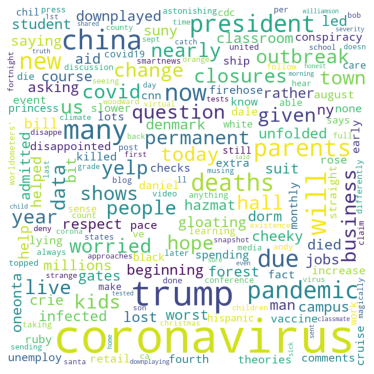

In [23]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = '' 
stopwords = set(STOPWORDS) 
for val in df_user_tweets.Tweets: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

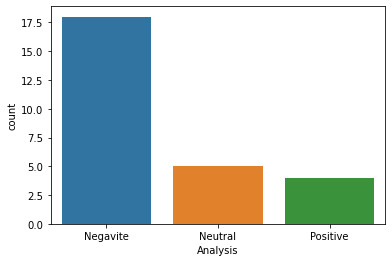

In [24]:
df_user_tweets['Analysis'].value_counts()
sns.countplot('Analysis',data=df_user_tweets)

In [101]:
nb.predict(vectorizer.transform([change_text("i hate covid-19")]))

array([-1], dtype=int64)

In [103]:
nb.predict(vectorizer.transform([change_text("i really enjoyed this lockdown and explored many things")]))

array([1], dtype=int64)

In [109]:
nb.predict(vectorizer.transform([change_text("Athena Security’s Temperature Detection iPad App is Helping to Fight COVID?")]))

array([0], dtype=int64)